<a href="https://colab.research.google.com/github/TranPhuong3289/CNN_AI_Artificial-Intelligence/blob/main/PH%C3%82N_LO%E1%BA%A0I_TI%E1%BB%80N_VN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PHÂN LOẠI 11 LOẠI TIỀN GIẤY VN - CNN**

In [ ]:
#Kết nối Drive với ggcolab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#KHAI BÁO TẤT CẢ THƯ VIỆN CẦN DÙNG
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [ ]:
#ĐƯỜNG DẪN ĐẾN TẬP TRAIN, VALIDATION,TEST TRONG MYDRIVE
train_data = '/content/drive/MyDrive/tai lieu AI/data_ 11MONEY_VN/train_data'
val_data  =  '/content/drive/MyDrive/tai lieu AI/data_ 11MONEY_VN/test_data'
test_data =  '/content/drive/MyDrive/tai lieu AI/data_ 11MONEY_VN/test_data'


In [ ]:
#CHỈNH LẠI TỈ LỆ VÀ PRE-PREPROCESSING DATA

data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_input = data_scale.flow_from_directory(train_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
test_input = data_scale.flow_from_directory(test_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")

Found 285 images belonging to 11 classes.
Found 179 images belonging to 11 classes.
Found 179 images belonging to 11 classes.


In [ ]:
#ĐẶT NHÃN
class_name = ['200vnd', '500vnd', '1000vnd', '2000vnd', '5000vnd', '1000vnd', '10k_vnd', '20k_vnd', '50k_vnd','100k_vnd', '200k_vnd','500k_vnd']

#IN NHÃN VÀ ĐẶT GIÁ TRỊ CHO TỪNG PHẦN TỬ
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print("Tổng cộng các loại tiền: ",train_input.num_classes)

labels:  ['200vnd', '500vnd', '1000vnd', '2000vnd', '5000vnd', '1000vnd', '10k_vnd', '20k_vnd', '50k_vnd', '100k_vnd', '200k_vnd', '500k_vnd']
match class:  {'100k_vnd': 0, '10k_vnd': 1, '1k_vnd': 2, '200k_vnd': 3, '200vnd': 4, '20k_vnd': 5, '2k_vnd': 6, '500k_vnd': 7, '500vnd': 8, '50k_vnd': 9, '5k_vnd': 10}
Tổng cộng các loại tiền:  11


In [ ]:
#XÂY DỰNG MODEL CNN
model=Sequential()

#TRÍCH XUẤT TẬP DỮ LIỆU(FEATURE EXTRACTORS)
#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 512 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(11,activation='softmax'))  #11 class_name
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

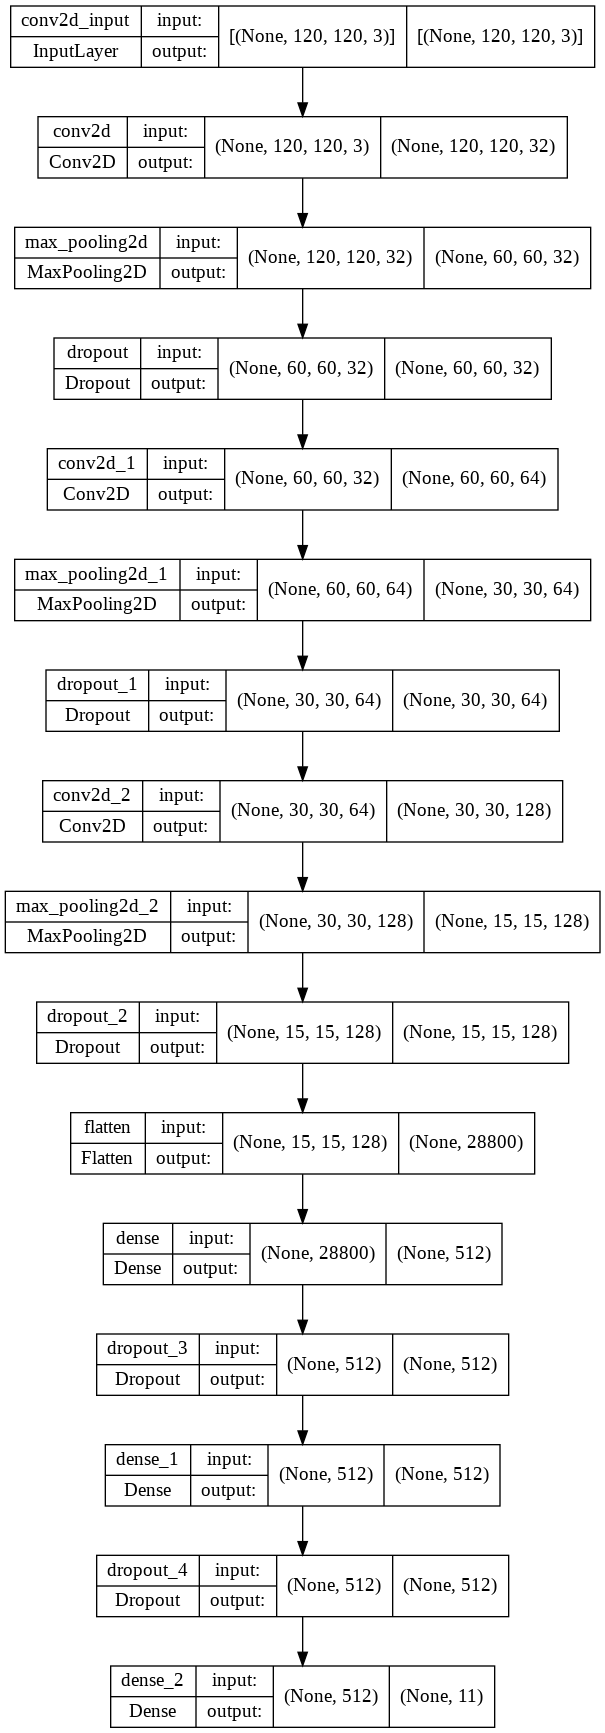

In [ ]:
#hiển thị hàm model.summary() dưới dạng biểu đồ 
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

**COMPILE AND TRANING DATA**

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#training với 150 lần học số lần học cùng lúc 50
money_train = model.fit(train_input,batch_size=50,epochs=150,verbose=1,validation_data=val_input)

Epoch 1/150
9/9 [==============================] - 111s 11s/step - loss: 29.8739 - accuracy: 0.0702 - val_loss: 2.3875 - val_accuracy: 0.1117
Epoch 2/150
9/9 [==============================] - 4s 438ms/step - loss: 2.4787 - accuracy: 0.1088 - val_loss: 2.3969 - val_accuracy: 0.0670
Epoch 3/150
9/9 [==============================] - 4s 428ms/step - loss: 2.3966 - accuracy: 0.1088 - val_loss: 2.3962 - val_accuracy: 0.1061
Epoch 4/150
9/9 [==============================] - 4s 437ms/step - loss: 2.3929 - accuracy: 0.1053 - val_loss: 2.3942 - val_accuracy: 0.1285
Epoch 5/150
9/9 [==============================] - 4s 436ms/step - loss: 2.3851 - accuracy: 0.1404 - val_loss: 2.3892 - val_accuracy: 0.1061
Epoch 6/150
9/9 [==============================] - 4s 439ms/step - loss: 2.3893 - accuracy: 0.0877 - val_loss: 2.3811 - val_accuracy: 0.1173
Epoch 7/150
9/9 [==============================] - 4s 436ms/step - loss: 2.3742 - accuracy: 0.1368 - val_loss: 2.3818 - val_accuracy: 0.1620
Epoch 8/150


**After training:**
*   Training accuracy: 98.6%
*   Validation accuracy: 99.44%


In [ ]:
#Lưu lại model training
model.save('/content/drive/MyDrive/tai lieu AI/data_ 11MONEY_VN/Money_classification.h5')

In [ ]:
#In kết quả loss và accuracy của tập training data
test_loss, test_acc = model.evaluate(train_input)
print("\nTest Accuracy: ",test_acc)

9/9 [==============================] - 2s 254ms/step - loss: 0.0270 - accuracy: 0.9930

Test Accuracy:  0.9929824471473694


In [ ]:
#Loading the model
model_1 = tf.keras.models.load_model('/content/drive/MyDrive/tai lieu AI/data_ 11MONEY_VN/Money_classification.h5')
model_1.summary()
#plot_model(model_1, show_shapes = True) #chạy hiển thị model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

Text(0.5, 0, 'epoch')

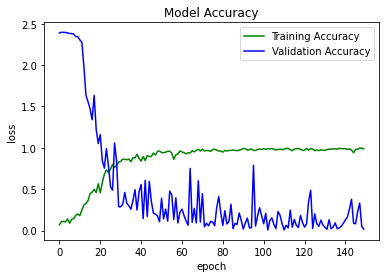

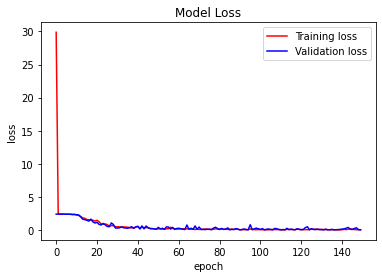

In [ ]:
#Vẽ hàm mất mát và độ chính xác của model
#Graphing loss function and accuracy scores of the model

acc = money_train.history['accuracy'] #traning accuracy scores from the model has trained
val_acc = money_train.history['val_accuracy'] # validatioin accuracy scores from has trained
loss = money_train.history['loss']#training loss scores from the model that has trained
val_loss = val_acc = money_train.history['val_loss'] 


plt.plot(acc,'green', label = 'Training Accuracy')
plt.plot(val_acc,'blue', label = 'Validation Accuracy') 
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend() #hiển thị chú thích
plt.figure()  # tách 2 data riêng biệt accuracy và loss

plt.plot(loss,'red',label = 'Training loss')
plt.plot(val_loss, 'blue',label = 'Validation loss')
plt.legend()
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

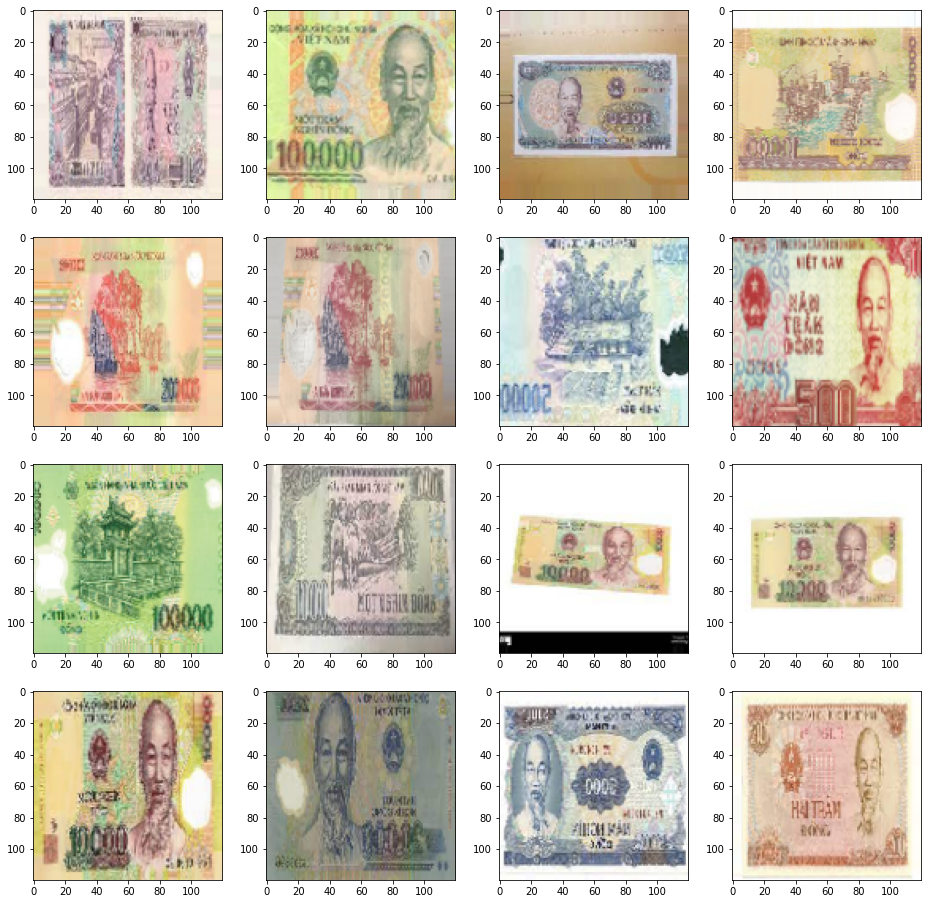

In [ ]:
#Hiển thị ảnh các loại tiền
X_TEST, Y_TEST = next(test_input)
fig = plt.figure(figsize=(16,16))  
colums = 4 #in 4 hàng 4 cột random loại tiền
rows = 4

for i in range(rows*colums):
    fig.add_subplot(rows, colums, i+1)
    plt.imshow(X_TEST[i])

In [ ]:
X,Y = test_input.next()
print('Kích thước tập test:',X.shape)


Kích thước tập test: (32, 120, 120, 3)


Mệnh giá tiền: 50.000vnđ


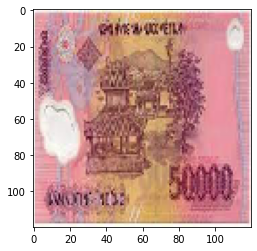

In [ ]:
#Lấy ảnh từ tập test để dự đoán: 
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_ 11MONEY_VN/test_data/50k_vnd/images (5).jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Mệnh giá tiền: 100.000vnđ")
if guess[0]==1:
  print("Mệnh giá tiền: 10.000vnđ")
if guess[0]==2:
  print("Mệnh giá tiền: 1.000vnđ")
if guess[0]==3:
  print("Mệnh giá tiền: 200.000vnđ")
if guess[0]==4:
  print("Mệnh giá tiền: 200vnđ")
if guess[0]==5:
  print("Mệnh giá tiền: 20.000vnđ")
if guess[0]==6:
  print("Mệnh giá tiền: 2.000vnđ")
if guess[0]==7:
  print("Mệnh giá tiền: 500.000vnđ")
if guess[0]==8:
  print("Mệnh giá tiền: 500vnđ")
if guess[0]==9:
  print("Mệnh giá tiền: 50.000vnđ")
if guess[0]==10:
  print("Mệnh giá tiền: 5.000vnđ") 

Mệnh giá tiền: 500.000vnđ


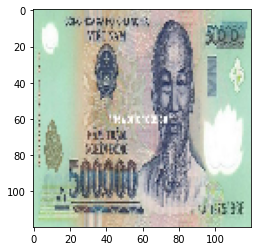

In [ ]:
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_ 11MONEY_VN/test_data/500k_vnd/1_200428101141_1 (1).jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
if guess[0]==0:
  print("Mệnh giá tiền: 100.000vnđ")
if guess[0]==1:
  print("Mệnh giá tiền: 10.000vnđ")
if guess[0]==2:
  print("Mệnh giá tiền: 1.000vnđ")
if guess[0]==3:
  print("Mệnh giá tiền: 200.000vnđ")
if guess[0]==4:
  print("Mệnh giá tiền: 200vnđ")
if guess[0]==5:
  print("Mệnh giá tiền: 20.000vnđ")
if guess[0]==6:
  print("Mệnh giá tiền: 2.000vnđ")
if guess[0]==7:
  print("Mệnh giá tiền: 500.000vnđ")
if guess[0]==8:
  print("Mệnh giá tiền: 500vnđ")
if guess[0]==9:
  print("Mệnh giá tiền: 50.000vnđ")
if guess[0]==10:
  print("Mệnh giá tiền: 5.000vnđ")

Mệnh giá tiền: 20.000vnđ


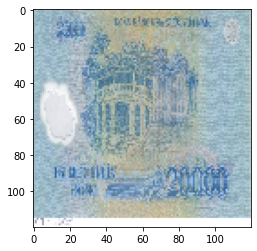

In [ ]:
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_ 11MONEY_VN/test_data/20k_vnd/20000-dong-2012_15948_01595474554f4be29L.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
if guess[0]==0:
  print("Mệnh giá tiền: 100.000vnđ")
if guess[0]==1:
  print("Mệnh giá tiền: 10.000vnđ")
if guess[0]==2:
  print("Mệnh giá tiền: 1.000vnđ")
if guess[0]==3:
  print("Mệnh giá tiền: 200.000vnđ")
if guess[0]==4:
  print("Mệnh giá tiền: 200vnđ")
if guess[0]==5:
  print("Mệnh giá tiền: 20.000vnđ")
if guess[0]==6:
  print("Mệnh giá tiền: 2.000vnđ")
if guess[0]==7:
  print("Mệnh giá tiền: 500.000vnđ")
if guess[0]==8:
  print("Mệnh giá tiền: 500vnđ")
if guess[0]==9:
  print("Mệnh giá tiền: 50.000vnđ")
if guess[0]==10:
  print("Mệnh giá tiền: 5.000vnđ")

Mệnh giá tiền: 2.000vnđ


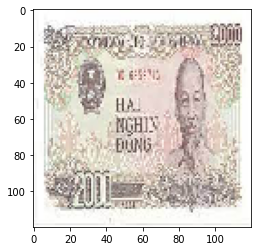

In [ ]:
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_ 11MONEY_VN/test_data/2k_vnd/images.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
if guess[0]==0:
  print("Mệnh giá tiền: 100.000vnđ")
if guess[0]==1:
  print("Mệnh giá tiền: 10.000vnđ")
if guess[0]==2:
  print("Mệnh giá tiền: 1.000vnđ")
if guess[0]==3:
  print("Mệnh giá tiền: 200.000vnđ")
if guess[0]==4:
  print("Mệnh giá tiền: 200vnđ")
if guess[0]==5:
  print("Mệnh giá tiền: 20.000vnđ")
if guess[0]==6:
  print("Mệnh giá tiền: 2.000vnđ")
if guess[0]==7:
  print("Mệnh giá tiền: 500.000vnđ")
if guess[0]==8:
  print("Mệnh giá tiền: 500vnđ")
if guess[0]==9:
  print("Mệnh giá tiền: 50.000vnđ")
if guess[0]==10:
  print("Mệnh giá tiền: 5.000vnđ")